# Machine Learning

In [8]:
# 表の左寄せ表示

In [1]:
%%html
<style>
table {float:left}
</style>

## Index
1. [インポート](#1_インポート)
1. [データ収集](#2_データ収集)
1. [データの前処理](#データの前処理)
1. [基礎集計](#基礎集計)
1. [特徴量抽出・変数選択](#特徴量抽出・変数選択)
1. [データ分割](#データ分割)
1. [モデル選択](#モデル選択)
1. [学習](#学習)
1. [予測・評価](#予測・評価)
1. [ハイパーパラメータチューニング](#ハイパーパラメータチューニング)

## 機械学習の目的
入力された情報をもとに正しい情報を出力するモデルを構築する<br>
- 予測
- 識別
- 分類

## 機械学習の種類
- 教師あり
    - 分類 : 出力のデータがカテゴリー変数
    - 回帰 : 出力されるデータが量的変数
- 教師なし
    カテゴライズさせる
- 強化
    アルゴリズムが受け取る報酬で訓練する

## 機械学習を構成する要素
- データ
- モデル
- 目的関数
　正しい値とモデルが導き出した値の差を計算するために用いられ、<br>
  モデルがデータをどれだけ正確にとらえているかを示す<br><br>
      - 損失関数 L(y,t)　: 小さければ小さいほど正確　（教師あり学習）
         ->  分類 : クロスエントロピー
         ->  回帰 : L2-ノルム（最小二乗法を利用）
      - 報酬関数  : 大きければ大きいほど正確　（強化学習）
<br>
- 最適化アルゴリズム
      - 勾配降下法（可変量における微分量を示す）

## 入出力・評価指標の設計

#### 目的変数

- 課題を解決するために何を予測するべきか
- 既存データに⽬的変数として利⽤できるものはあるか

#### 説明変数

- ⽬的変数を予測するためにどんな説明変数が必要か
- 既存データに説明変数として利⽤できるものはあるか

#### 評価指標の決定

予測結果をどのような指標で評価すれば課題解決への効果を確かめられるか

In [2]:
# 警告(worning)の非表示化
import warnings
warnings.filterwarnings('ignore')

## 1_インポート

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## 2_データ読込

ネットより収集

In [ ]:
url=''

In [ ]:
data = pd.read_table(filepath_or_buffer = url, sep = ',', dtype = {'pclass':'str'})

ファイルパスを指定して読込み

CSV

In [2]:
fileName=''

In [ ]:
data = pd.read_csv(fileName)

npz

In [ ]:
training_data =np.load('TF_intro.npz')

## 3_データ確認

### 3.1_データサイズの確認

In [ ]:
# データの行数・/列数
print(data.shape)

In [ ]:
# データの要素数
print(data.size)

### 3.2_データ構成の確認

In [ ]:
# データの上３行
display(data.head())
# データの下３行
display(data.tail())

In [ ]:
# データのカラム名
print(data.columns)
# データのインデックスナンバー等
display(data.index)

### 3.3_データの統計量確認

In [ ]:
#データの統計量
data.describe(include='all')

->　有意でないデータにあたりをつける

In [ ]:
# 欠損値確認
print(data.isna().sum())
print(data.isna().any(axis=1))

-> 欠損値の存在に理由があるかを考える<br>
   データが欠けている割合が5%未満であれば削除しても問題がない

### 3.4_データの可視化

In [ ]:
# 分布を確認する
sns.distplot(data['colA'])

In [2]:
# データごとの相関関係を表示
sns.pairplot(data)

## 4.データの統合

### データの結合

#### - データを横方向に結合

In [ ]:
# 変数格納
dfA = dataA
dfB = dataB
keyA = 'keyName'
keyB =''

In [ ]:
# dfAとdfBを列keyAの値に合わせて横方向に結合 / やカラムを削除しない
dfAB = pd.merge(dfA, dfB, on=keyA, how='outer')

In [ ]:
# # fA, dfBをkeyA, keyBに合わせて結合
# dfAB = pd.merge(dfA, dfB, on=['keyA, keyB])

In [ ]:
# # b_x,b_yと表記されていたが、それをkey_dfA, key_dfBと表示
# dfAB = pd.merge(dfA, dfB, left_on=keyA, right_on=keyB, suffixes=['_' + dfA, '_' + dfB])

In [ ]:
# データの先頭を表示
dfAB.head()

#### - データを縦方向に結合

In [ ]:
# 変数格納
dfA = dataA
dfB = dataB

In [ ]:
# dfAとdfBを縦方向に結合
dfAB = pd.concat([dfA, dfB], axis=0, join='outer', sort=True)

## 5_データ処理

   1. カテゴリカル変数の処理
   1. 欠損の処理
   1. スケーリング
   1. データ変換
   1. データ削減
   1. データ保存

### 5.1_カテゴリ変数の処理

#### - ワンホットエンコーディング

カテゴリが少ない場合

#### - バイナリエンコーディング

カテゴリがたくさんある場合

#### ダミー変数化

In [ ]:
pd.get_dummies(data, columns=['性別', '学年'], drop_first=True)

#### 重要な数値にフラグを立てる

In [ ]:
# countが４以上の行のフラグ列に1をたてる
uselog_weekday = uselog_weekday.groupby("customer_id",as_index=False).max()[["customer_id","count"]]
uselog_weekday['routing_flg']=0
uselog_weekday["routing_flg"] = uselog_weekday["routing_flg"].where(uselog_weekday["count"]<4,1)
uselog_weekday.head()

### 5.2_欠損値の処理

すべてが欠損値の行を削除する

In [4]:
# すべて欠損値の行を表示する
print(data.isna().all())

# すべて欠損値の行を削除する
data2 = data[data.isna().all(axis=1)]

### データの補完

In [ ]:
#最頻値でsizeカラムのデータ欠損を埋める
data = row_data.fillna({'size':data['colB'].mode()[0]})

### 表記ゆれ

### 5.3_スケーリング

### 正規化・標準化

入力変数の単位（m, mm）や比べる対象（温度、密度）が異なり、そのままの数字を使うと、<br>影響度合いをうまく評価できないため正規化する必要がある

- 標準化 (standardization)<br>
平均、分散（標準偏差）を使ったもの（平均を0、分散を1にする）

$
標準化された変数 = \frac{x- μ}{σ}
$
<br>
x : 元の変数  
μ : 元の変数の平均  
σ : 元の変数の標準偏差

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs) 

print(inputs_scaled)

In [ ]:
import pandas as pd

xss_pd = (x - x.mean()) / x.std()

print(xss_pd.head())

In [ ]:
import numpy as np

x_np = x.apply(lambda x: (x - np.mean(x)) / np.std(x))

print(x_np.head())

- Min・Maxスケーリング(min-max scaling)：<br>最大値が1, 最小値が0になるように正規化

In [ ]:
from sklearn import preprocessing

mscaler = preprocessing.MinMaxScaler()
mscaler.fit(x)
xms = mscaler.transform(x)

print(xms)

In [ ]:
x_ms = x.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

print(x_ms.head())

- 次元削除  
教師なし学習の一種で、なるべく情報を失わないように変数を削減し、新しい軸を作り出す。<br>
これにより５つの変数を２つの変数で表現でき、グラフ化が可能となる。<br>

In [4]:
# 主成分分析
from sklearn.decomposition import PCA
X = customer_clustering_sc

# モデル定義
pca = PCA(n_components=2)

# 主成分分分析実行
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)

# 結果を反映
pca_df["cluster"] = customer_clustering["cluster"]

In [ ]:
# 可視化
# グループごとに散布図をプロット
for i in customer_clustering["cluster"].unique():
    tmp = pca_df.loc[pca_df["cluster"]==i]
    plt.scatter(tmp[0], tmp[1])

- ホワイトニング  
結合した変数の裏にある関係を取り除く

### 5.4_データの変換

- モデルに適合するデータ形式に変換
- データの大きさの統一
- 標準化

#### Pandas ⇔ Numpy
https://note.nkmk.me/python-pandas-numpy-conversion/

Pandas ->　Numpy

In [ ]:
data_numpy = df.to_numpy()

Numpy ->　Pandas

In [ ]:
data_pandas = pd.Series(data_numpy)

In [ ]:
data_pandas = pd.DataFrame(data_numpy)

### 5.5_データの削除

有意でない列を削除する

In [ ]:
# dataからcolAを削除する
data = raw_data.drop(['colA'],axis=1)

### 外れ値の処理

-> 観測データの1%を取り除く<br>
DataFrame.quantile：  quantileとして指定した値を返す

In [4]:
# 上位１％を取り除く
q = row_data[row_data['colA']].quantile(0.99)
data = row_data[row_data['colA'] < q]

In [ ]:
# 下位１％を取り除く
q = row_data[row_data['colB']].quantile(0.01)
data = row_data[row_data['colB'] > q]

### 5.6_データ保存

前処理後のデータを保存する

#### Pickle

In [6]:
data_cleaned = data.reset_index(drop=True)
pd.to_pickle(data_cleaned, "data_cleaned.pkl")

#### npz

In [ ]:
np.savez('TF_intro',inputs=generated_inputs,targets=generated_targets)

## 6_基礎集計

### 属性で集計

- 日付
- 期間
- 時間帯
- 性別
- 年齢

In [ ]:
data.groupby('group_name').count()['id']

In [ ]:
# 入会人数
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
customer_start = customer_join.loc[customer_join["start_date"] > pd.to_datetime("20180401")]
print(len(customer_start))

In [ ]:
# 最新の会員数
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
customer_newer = customer_join.loc[(customer_join["end_date"] >= pd.to_datetime("20190331"))|(customer_join["end_date"].isna())]
print(len(customer_newer))
# 正しく絞り込めているかユニークで確認する
print(customer_newer["end_date"].unique())

### 時系列で集計

In [9]:
# 顧客別/年月別で件数をカウントする

# 日付型に変更する
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
# 年月カラムを新たに作成する
uselog["年月"] =uselog["usedate"].dt.strftime("%Y%m")
# グループで件数を数える
uselog_months = uselog.groupby(["年月","customer_id"],as_index=False).count()
# カラム名を変える
uselog_months.rename(columns={"log_id":"count"},inplace = True)
# 不要なカラムを削除する
del uselog_months["usedate"]

display(uselog_months.head())

In [ ]:
# 平均値、中央値、最大値、最小値をグループごとに集計する
uselog_customer = uselog_months.groupby("customer_id").agg(["mean","median","max","min"])["count"]
uselog_customer = uselog_customer.reset_index(drop=False)
display(uselog_customer.head())

## 7_機械学習モデル作成

## 特徴量抽出・変数選択

特徴量抽出

- 説明変数の演算から抽出
- 他データテーブルから抽出
- ドメイン知識を使って抽出
- 特徴抽出を内包したモデルを使⽤

変数選択

- ステップワイズ法
- 相関係数に基づいて選択
- ドメイン知識を使って抽出
- 変数選択を内包したモデルを使⽤

## データ分割

- 学習データ (data_train)<BR>機械学習モデルに学習させるためのデータ<BR><BR>
- 検証データ (data_validation)<BR>モデルの予測精度を検証するためのデータ<BR><BR>
- 評価データ (data_test)<BR>未知のデータと仮定して、モデルの予測精度を評価するためのデータ
    - 生成源別
    - 時系列
    - holdout  
        単純に分割  
    - クロスバリデーション  
        データセットをk個に分割し、そのうち（k-1）個を訓練データに、<br>
        残りの一つをテストデータに割り当てる
  
  
https://note.nkmk.me/python-sklearn-train-test-split/

In [2]:
# 学習データと訓練データの切り分け
from sklearn.model_selection import train_test_split

In [ ]:
# holdout
dataA_train, dataB_test = train_test_split(a,test_size=0.2,shuffle=True,random_state=42)

データ同士の対応関係を維持したままデータを切り分けることができる

In [ ]:
dataA_train, dataB_test, dataB_train, dataB_test = train_test_split(dataA, dataB ,test_size=0.2,shuffle=True,random_state=42)

## モデル選択
- Microsoftのクラウド環境が提供するチートシート<br>
https://docs.microsoft.com/ja-jp/azure/machine-learning/algorithm-cheat-sheet
- scikit-learn のアルゴリズムチートシート<br>
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## 学習
学習⽤データの説明変数・⽬的変数ペアをモデルに⼊⼒し、学習を⾏う

## 予測・評価
検証・評価データで実際に予測を⾏い、評価指標によって性能を確かめる

### ●回帰の評価指標
https://qiita.com/Hatomugi/items/d00c1a7df07e0e3925a8

### - 決定係数R2
推定された回帰モデルの当てはまりの良さを評価する

### - 平均絶対誤差 MAE (Mean Absolute Error) 
予測値の誤差の⼤きさ(⼩ささ)を評価する
https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

### - 平均二乗誤差 MSE (Mean Squared Error) 
予測値と実測値の差を二乗して、誤差の⼤きさ(⼩ささ)を評価する
https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

>MAEがデータの中央値寄りなのに対し、MSEは平均値に近いと考えると分かりやすい

### - Huber Loss
Huber Lossとは損失が大きいとMAEに似た機能をし、損失が小さいとMSEの機能になる。MAEとMSEの良いとこどり。

### - MAPE (Mean Absolute Percentage Error)
正解値の⼤きさあたりの予測誤差の⼤きさ(⼩ささ)を評価する

### - RMSE (Root Mean Squared Error)
⼤きな誤差を重要視して評価する

### - MLE(最尤推定法)
尤度関数：<br>
作成したモデルが、実際の変数間の関係をどれくらいよく示しているか<br>
尤度関数の値が大きいほど、モデルが正確である確率が高いことを意味する<br>
最尤推定法は、尤度関数の値を最大化するよう試みる<br>
コンピュータは尤度の値が最大になるように演算を繰り返す

### - Log-cosh Loss
Huber Lossと同じように、基本MAEだが損失が小さくなるとMSEに近くなる。

### - Log-Likelihood（対数尤度）
対数をとることによって最尤推定法がしやすくなる<br>
値が大きいほど良い

### - LL-Null(対数尤度のnull)<br>
説明変数のない場合の対数尤度を示す

### - LLR(対数尤度比)<br>
モデルが統計的にLLNullと異なるか。<br>
すなわち意味がないモデルかどうかを確認するために使う

### - Poisson Loss(ポアソン損失 )<br>
ポアソン分布とはX軸をとある事象が起こる数、Y軸をその夫々の回数が起こる確率とを表す分布である。

### - Pseudo R-squ(疑似決定係数)
疑似決定係数の値は0.2~0.4の間が良いとされている<br>
- AIC
- BIC
- McFadden's決定係数

### ●分類の評価指標

#### - 混同⾏列
正解と予測それぞれの陽性(陰性)データを数えた表

||Positive<br>(predicted 0)|Negative<br>(predicted 1)|
|:-|:-|:-|
|Positive<br>(Actual 0)|True Positive(TP)<br>(モデル=0/実際=0)|False Negative(FN)<br>(モデル=1/実際=0)|
|Negative<br>(Actual 1)|False Positive(FP)<br>(モデル=0/実際=1)|True Negative(TN)<br>(モデル=1/実際=1)|

In [ ]:
# 混同行列
cn_df = pd.DataFrame(result.pred_table())
cn_df.columns['predicted 0','predicted 1']
cn_df = cn_df.rename(index = {0:'Actual 0',1:'Actual 1'})
cn_df

In [ ]:
# 混同行列＠statsmodels
def confusion_matrix(data,actual_values,model):
    pred_values = model.predict(data)
    bins=np.array([0,0.5,1])
    cm = np.histogram2d(actual_values,pred_values,bins=bins)[0]
    accuracy = cm[0,0]+cm[1,1]/cm.sum()
    return cm, accuracy

cm = confusion_matrix(test_data,test_actual,results)
cn_df = pd.DataFrame(cm.pred_table())
cn_df.columns['predicted 0','predicted 1']
cn_df = cn_df.rename(index = {0:'Actual 0',1:'Actual 1'})
cn_df

#### - 正解率 (Accuracy)
予測(分類)が正解した割合

>$
Accuracy　= \frac{TP + TN}{TP + FN + FP + TN}
$

#### - 適合率 (Precision)
Positive(陽性)と予測したデータのうち、実際に陽性だった割合

>$
Precision = \frac{TP}{TP + FP}
$

#### - 再現率 (Recall)
正解が陽性のデータのうち、陽性と予測できた割合

>$
Precision = \frac{TP}{TP + FN}
$

#### - 誤分類率(TP rate)

>$
誤分類率　= \frac{FP + FN}{TP + FN + FP + TN}
$

#### - 真陽性率
>$
真のPositiveを正しく分類できた割合 = \frac{TP}{(TP + FN)}
$

#### - 偽陽性率(FP rate)
>$
真のNegativeを誤分類した割合 = \frac{FP}{(FP + TN)}
$

#### - 特異度 (Specificity)
正解が陰性のデータのうち、陰性と予測できた割合

#### - F値
適合率と再現率のバランスを重視した指標

適合率と再現率の調和平均
>$
F-measure　= \frac{2}{1 / precision + 1 / recall}
$

#### - AUC(PR曲線)
適合率と再現率のトレードオフをPR曲線で確認し、AUCで評価する

#### - AUC (ROC曲線)
真陽性率と偽陽性率のトレードオフをROC曲線で確認し、AUCで評価する


## ハイパーパラメータチューニング

- パラメータ ->　最適化の中で決定
    - 重み(w)
    - バイアス(b)
<br><br>
- ハイパーパラメータ　-> 初期値として設定
    - 幅
    - 深さ
    - 学習率
    - バッチサイズ
    - Momentumの定数(alpha)
    - 定数(c)

#### 幅

#### 深さ

#### 学習率
各層の重みを一度にどの程度変更するかを決める  
モデルの学習を適切に行うためには、 損失関数に対する適切な学習率を設定する必要 がある

### 過学習
過学習を防ぐための手法

#### 訓練と検証
- 訓練では損失関数の結果は０に近づいていく
- 検証ではある一定箇所までは損失関数の結果は減少していくが、  
  ある箇所で損失関数の結果が増加する。　-->　過学習が発生

#### アーリーストッピング

過学習を始める前に訓練を止める方法を検討する。
1. 繰り返しの回数を事前に決めておく
1. 損失関数の結果の変化量（更新量）が小さくなった時点で止める
<br>
<br>上記いずれの場合でも「過学習」を防ぐことはできない。<br><br>
1. 検証データセットを使う

### 最適化

アルゴリズムはモデルのパラメータを変化させるために使われる

- 勾配降下法(Gradient descent)  
  初期値の重みに基づき、少しずつパラーメータを変化させ、最適解を探していく。  
- 確率的勾配降下法(Stochastic Gradient descent)  
  重みを毎回変化させ（バッチ処理のように。。最初は大きく、  
  だんだん小さな重みに変化せていく）、  最適解をさがしていく。

勾配降下法では極小値と最小値を区別できず、本来の大域的最適解を算出できない場合がある。

### Momentum（慣性）
勾配降下法の弱点を補う。  
学習率をスケジュール(例：指数を活用)することで降下速度をコントロールする。  

$
η = η0 * e^{-n/c}  
$
<br><br>
n : 今の繰り返しの回数  
c : 定数  
定数の設定にルールはないが、  
繰り返しの回数　100  : 50  < c <  500  
繰り返しの回数　1000 : 500 < c < 5000

### 学習率のスケジュール
- AdaGrad(TensorFlow default)
- RMSProp

### Adam(Adaptive moment estimation
Momentumと学習率のスケジュールのいいところどり

### 正規化

#### 初期化（Initialization）
重みの初期値を決めるプロセスのこと

Xavier initialization (Glorot initialization)

# モデル

### ML cheat sheet<br>
https://docs.microsoft.com/ja-jp/azure/machine-learning/media/algorithm-cheat-sheet/machine-learning-algorithm-cheat-sheet.svg<br>
What do you want to do?<br>
<br>
1. Generate recommendattions<br>
    -> Recommenders<br>
    - SVD Recommender:<br>
    Predicts what someone will be interested in<br>
<br>
1. Discover structure<br>
   -> Clustering<br>
    - K-Means:<br>
    Separates similar data point into intuitive groups
    <br>
<br>
1. Find unusual occurences<br>
   -> Anomaly Detection<br>
    - One Class SVM:<br>
    Under 100 features, aggressive boundary
    - PCA-Based Anomaly Detection:<br>
    Fast training times
    <br>
<br>
1. Predict values<br>
   -> Regression<br>
        Makes forecasts by estimating the relationship between values
    - Fast Forest Quantile Regression:<br>
    Predicts distribution
    - Poisson Regression:<br>
    Predicts event counts
    - Linear Regression:<br>
    Fast training, linear model<br>
    - Bayesian Linear Regression:<br>
    Linear model, small data sets
    - Decision Forest Regression:<br>
    Accurate, fast training times
    - Neural Network Regression:<br>
    Accurate, long training times
    - Boosted Decision Tree Regression:<br>
    Accurate, fast training times, karge memory footprint
    <br>
<br>
1. Extract information from text<br>
    -> Text Analytics<br>
    - Extract N-Gram Features from Text:<br>
    Creates a dictionary of n-grams from a column of free text<br>
    - Feature Hashing:<br>
    Coverts text data to integer encoded features using the Vowpal Wabbit library<br>
    - Preprocess Text<br>
    Performs cleaning operations on text, like removal of stop-words, case normalization<br>
    - Word2Vector:<br>
    Converts words to values for use in NLP tasks, like recommender, named entity recognition, machine translation<br>
    <br>
<br>    
1. Predict between several categories<br>
   -> Multiclass Classification<br>
   - Multiclass Logistig Regression:<br>
   Fast training times, linear model<br>
   - Multiclass Newral Network<br>
   Accuracy, long training times
   - Multiclass Descision Forest:<br>
   Accuracy, fast training times
   - One-vs-All Multiclass:<br>
   Depends on the two-class classifier
   - Multiclass Boosted Decision Tree:<br>
   Non-parametric, fast training times and scalable<br>
   <br>
<br> 
1. Predict between two categories<br>
   -> Two-Class Classification<br>
   Answers simple two-choice questions, like yes or no, true or false<br>
   - Two-Class Support Vector Machine:<br>
   Under 100 features, linear model<br>
   - Two-Class Averaged Perception:<br>
   Fast training, linear model<br>
   - Two-Class Logisic Regression:<br>
   Fast training, linear model<br>
   - Two-Class Boosted Decision Tree:<br>
   Accurate, fast training, large memory footprint<br>
   - Two-Class Neutral Network:<br>
   Accurate, long training times<br>
   <br>
<br>
1. Classify images<br>
   -> Image Classification<br>
   Classifies images with popular network<br>
   <br>
   ●クラス分類<br>
   あらかじめクラスが既知のデータを照合する教師あり学習<br>
   
   - DenseNet:<br>
   High accuracy, better efficieny

### scikit-learn algorithm cheat-sheet<br>
https://scikit-learn.org/stable/_static/ml_map.png<br>

1. Regression<br>
1. Classification<br>
1. Clustering<br>
1. Dimensionality reduction<br>

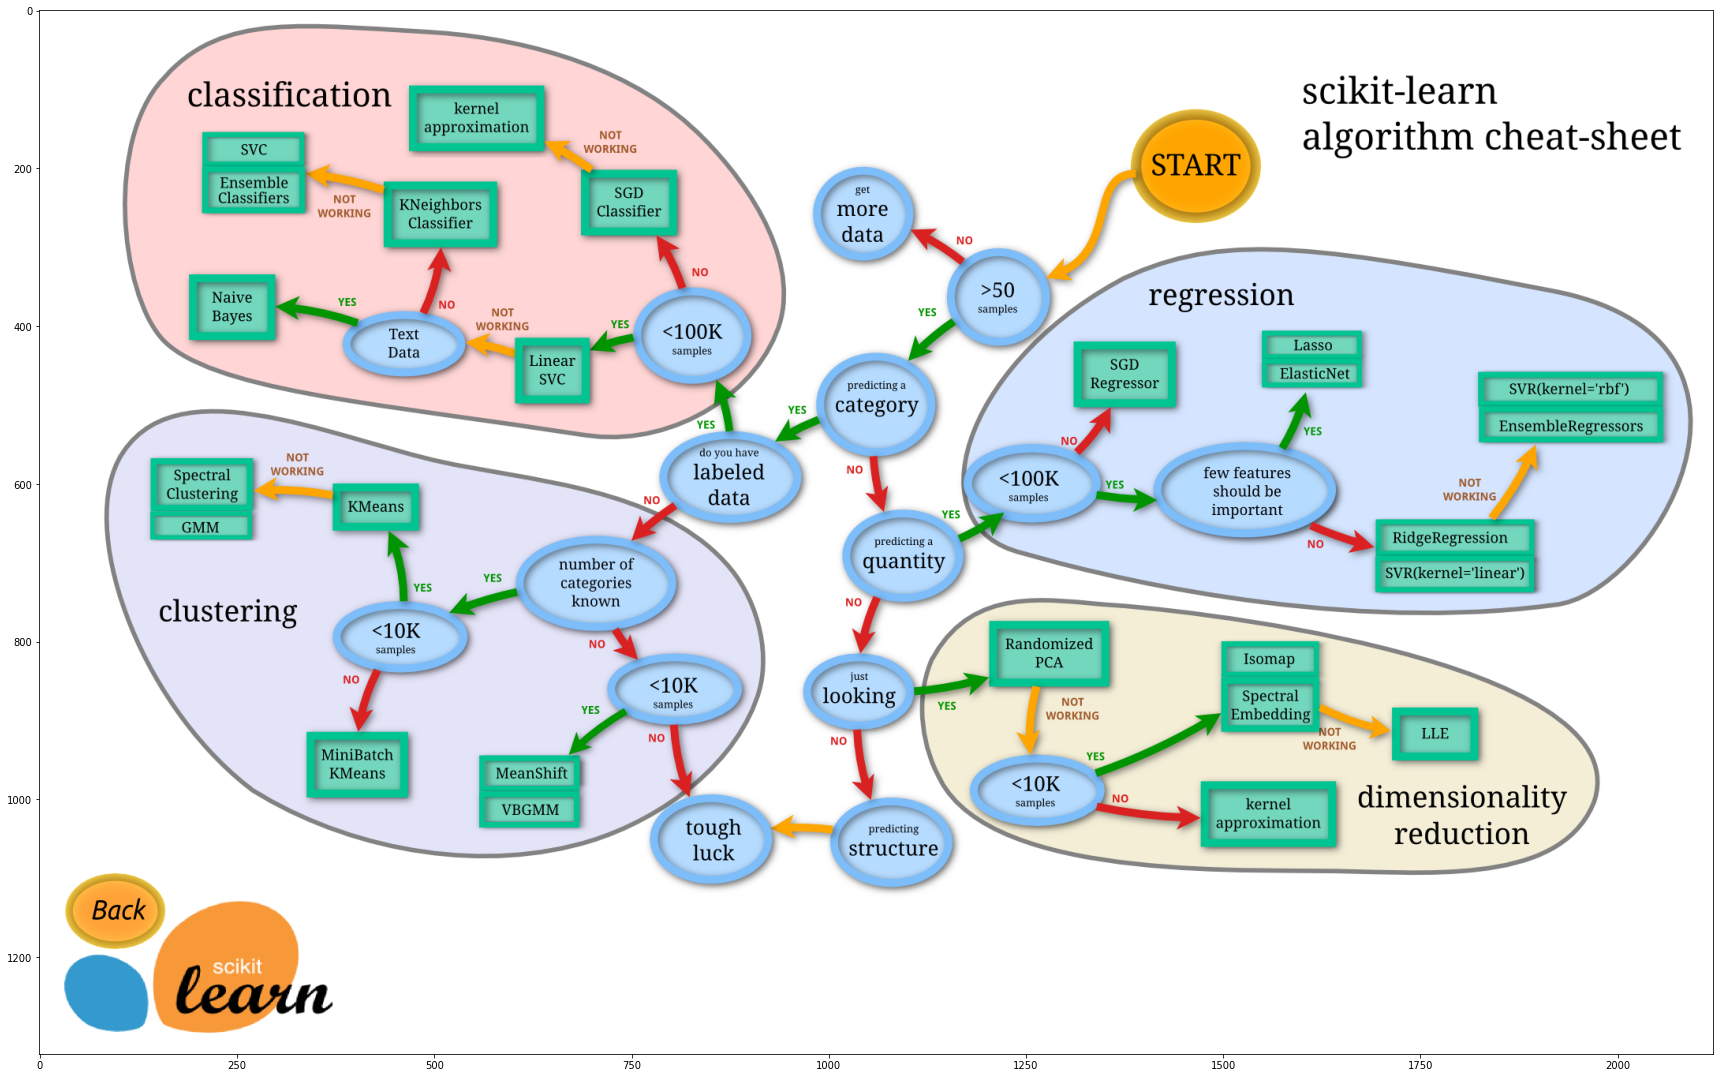

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig = plt.figure(figsize=(30, 30))
plt.imshow(mpimg.imread("../MachineLearning/cheat_sheet/ml_map.png"))

## クラス分類
教師あり学習。
- SVM<br>
    有力な分類性のを有する。非線形にも対応。


◆非階層型<br>
分割の良さの評価関数にい基づき分割を探索する。<br>
    - K-Means:<br>

◆階層型<br>
類似度の高いものから順にまとまり（クラスタ）を作成する。<br>
    - dedrogram:樹形図を用いた凝集型

## 回帰モデル
連続的な数値を分析する場合

### 分類モデル
クラスに分類する場合

## 3_クラスタリング

In [ ]:
# 顧客をグループ化
customer_clustering = customer[["mean", "median","max", "min", "membership_period"]]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# 標準化
sc = StandardScaler()

# 変数に格納
customer_clustering_sc = sc.fit_transform(customer_clustering)

# K-meansのモデル構築
# n_clusters：クラスタ数
kmeans = KMeans(n_clusters=4, random_state=0)

# モデル定義
clusters = kmeans.fit(customer_clustering_sc)

# クラスタリング結果を反映
customer_clustering["cluster"] = clusters.labels_
print(customer_clustering["cluster"].unique())
customer_clustering.head()

In [ ]:
# 列名の変更
customer_clustering.columns = ["月内平均値","月内中央値", "月内最大値", "月内最小値","会員期間", "cluster"]

# クラスターごとに集計
customer_clustering.groupby("cluster").count()

# クラスターごとの平均値を集計
customer_clustering.groupby("cluster").mean()

クラスタリング結果の可視化